#Arnav Singh
#Applied Data Science 
#Assignment 2

1. Download the dataset: https://drive.google.com/file/d/10IZ6wdh8x9hpr3WpUqf2t9hj-xG31C61/view

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the dataset.

In [3]:
df = pd.read_csv('titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


3. Perform Below Visualizations.

● Univariate Analysis

● Bi - Variate Analysis

● Multi - Variate Analysis

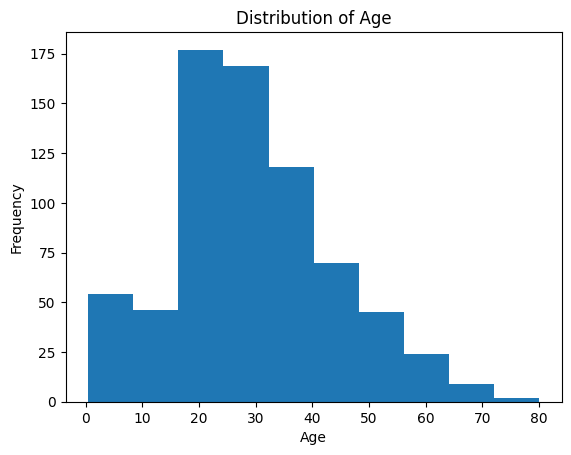

In [4]:
# Univariate Analysis
# Distribution of age
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

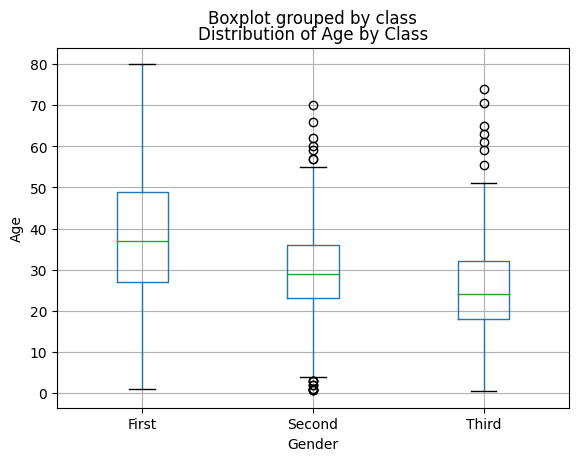

In [5]:
#Bivariate Analysis:
df.boxplot(column='age', by='class')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Distribution of Age by Class')
plt.show()

<ipython-input-6-07b31ab794d4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


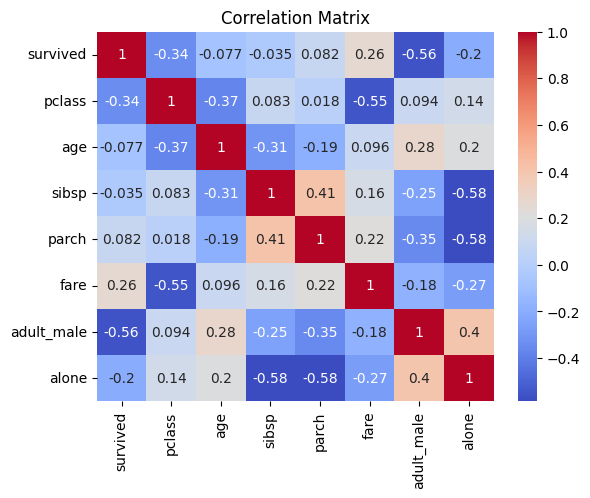

In [6]:
#Multivariate Analysis:

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

4. Perform descriptive statistics on the dataset.

In [7]:
#Numerical variables
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Categorical variables
df.describe(include='object')

,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


5. Handle the Missing values.

In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
df['age'].interpolate(inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['deck'].fillna(df['deck'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

6. Find the outliers and replace the outliers

In [11]:
# Define a function to identify and replace outliers using Z-score
def replace_outliers_zscore(data, column, threshold):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    df[column] = np.where(abs(z_scores) > threshold, df[column].median(), df[column])

# Specify the columns to check for outliers and the threshold value
columns_to_check = ['age', 'fare']
z_score_threshold = 3

# Replace outliers using Z-score method
for column in columns_to_check:
    replace_outliers_zscore(df, column, z_score_threshold)

# Print the updated dataset with replaced outliers
print(df)


     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female  22.5      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

7. Check for Categorical columns and perform encoding.

In [12]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)

# Perform one-hot encoding
encoded_data = pd.get_dummies(df, columns=categorical_columns)
print("\nEncoded Data:")
print(encoded_data)


Categorical Columns:
Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')

Encoded Data:
     survived  pclass   age  sibsp  parch     fare  adult_male  alone  \
0           0       3  22.0      1      0   7.2500        True  False   
1           1       1  38.0      1      0  71.2833       False  False   
2           1       3  26.0      0      0   7.9250       False   True   
3           1       1  35.0      1      0  53.1000       False  False   
4           0       3  35.0      0      0   8.0500        True   True   
..        ...     ...   ...    ...    ...      ...         ...    ...   
886         0       2  27.0      0      0  13.0000        True   True   
887         1       1  19.0      0      0  30.0000       False   True   
888         0       3  22.5      1      2  23.4500       False  False   
889         1       1  26.0      0      0  30.0000        True   True   
890         0       3  32.0      0      0   7.7500        True   True 

8. Split the data into dependent and independent variables.

In [13]:
# Split into independent and dependent variables
X = df.drop('survived', axis=1)  # Independent variables
y = df['survived']  # Dependent variable

# Print the shapes of the independent and dependent variables
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (891, 14)
Shape of y: (891,)


9. Scale the independent variables

In [21]:
from sklearn.preprocessing import StandardScaler

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])
X_scaled

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.827377,male,-0.555521,0.432793,-0.473674,-0.654170,S,Third,man,True,C,Southampton,no,False
1,-1.566107,female,0.611357,0.432793,-0.473674,1.549441,C,First,woman,False,C,Cherbourg,yes,False
2,0.827377,female,-0.263802,-0.474545,-0.473674,-0.630941,S,Third,woman,False,C,Southampton,yes,True
3,-1.566107,female,0.392567,0.432793,-0.473674,0.923690,S,First,woman,False,C,Southampton,yes,False
4,0.827377,male,0.392567,-0.474545,-0.473674,-0.626639,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,male,-0.190872,-0.474545,-0.473674,-0.456293,S,Second,man,True,C,Southampton,no,True
887,-1.566107,female,-0.774311,-0.474545,-0.473674,0.128737,S,First,woman,False,B,Southampton,yes,True
888,0.827377,female,-0.519056,0.432793,2.008933,-0.096671,S,Third,woman,False,C,Southampton,no,False
889,-1.566107,male,-0.263802,-0.474545,-0.473674,0.128737,C,First,man,True,C,Cherbourg,yes,True


10. Split the data into training and testing

In [16]:
from sklearn.model_selection import train_test_split

# Separate the independent and dependent variables
X = df.drop('survived', axis=1)  # Independent variables
y = df['survived']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (712, 14)
Shape of X_test: (179, 14)
Shape of y_train: (712,)
Shape of y_test: (179,)
